##Import and set style

In [2]:
import pandas as pd
%matplotlib inline
plt.style.use('forkedriver')
figsize(15,5)

##read the data

In [3]:
df = pd.read_csv('waitTime.csv',parse_dates=[0],index_col=[0])

##trim some of the data and take the average

In [4]:
trimmed = df['2013-02-11':'2013-03-15']
trimmed['weekday'] = trimmed.index.weekday
wtavg = trimmed.groupby('weekday').aggregate(mean)
wtavg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wtavg = wtavg[:5]
near_oak = ['San Francisco', 'Hayward', 'Daly City', 'Oakland']

##plot some averages for dmvs close to oakland

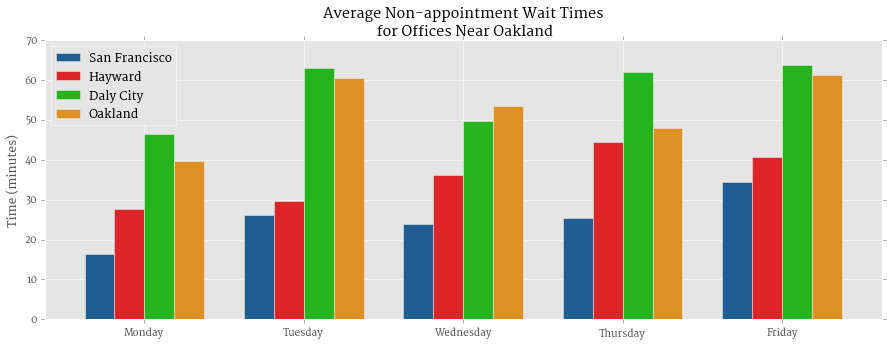

In [20]:
wtavg_ax = wtavg[near_oak].plot(kind='bar')
plt.title('Average Non-appointment Wait Times\n for Offices Near Oakland')
plt.ylabel('Time (minutes)')
locs,labels =plt.xticks()
ignored = plt.xticks(locs,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],rotation='horizontal')

#Time to try an ANOVA test for the mean value of a specific Tuesday:

In [59]:
tuesday = trimmed['2013-03-11 08':'2013-03-11 17'].resample('5min')
tuesday = tuesday.drop('weekday',1)
tues_means = tuesday.mean()
tues_std = tuesday.std()


Alturas           103.500000
Arleta             71.846001
Auburn             35.269032
Bakersfield        63.630249
Bakersfield-SW    122.099232
Banning            45.939052
Barstow            45.625000
Bell Gardens       75.928571
Bellflower         58.366115
Bishop             51.500000
Blythe             39.000000
Brawley            34.660931
Capitola           30.603629
Carmichael         44.969505
Chico              34.550498
...
Visalia                 26.860178
Walnut Creek            56.811116
Watsonville             38.658857
Weaverville             52.700000
West Covina            106.649556
West Hollywood          63.233333
West Sacramento-CDL     66.692308
Westminster             42.800499
Whittier                54.745091
Willows                 72.250000
Winnetka                40.633834
Woodland                32.786739
Yreka                   49.272727
Yuba City               64.312763
Unnamed: 175                  NaN
Length: 175, dtype: float64

In [17]:
trimmed = df['2013-02-11':'2013-03-15']
retrim = trimmed.resample('5min')

In [18]:
cleaned = retrim[retrim.index.dayofweek < 5]
cleaned = cleaned[cleaned.index.hour > 7]
cleaned = cleaned[cleaned.index.hour < 18]

Alturas     Arleta      Auburn  Bakersfield  \
Time Stamp                                                         
2013-02-11 08:00:00      NaN   0.000000    0.000000     0.000000   
2013-02-11 08:05:00      NaN   1.571429    0.357143     0.769231   
2013-02-11 08:10:00      NaN   5.461538    4.928571     5.571429   
2013-02-11 08:15:00      NaN   9.000000    6.571429    10.428571   
2013-02-11 08:20:00      NaN  10.714286    3.214286    13.285714   
2013-02-11 08:25:00      NaN  11.538462    0.000000    15.692308   
2013-02-11 08:30:00      NaN   6.357143    0.000000    19.571429   
2013-02-11 08:35:00      NaN   2.714286    2.428571    22.923077   
2013-02-11 08:40:00      NaN   0.769231    7.538462    27.538462   
2013-02-11 08:45:00      NaN   0.428571   13.230769    25.571429   
2013-02-11 08:50:00      NaN   0.000000   17.142857    23.714286   
2013-02-11 08:55:00      NaN   3.153846   22.153846    26.307692   
2013-02-11 09:00:00      NaN   4.500000   26.714286    30.071429   
2013-02-11 09:05:00       20   7.000000   33.571429    32.214286   
2013-02-11 09:10:00      NaN   8.538462   36.769231    25.461538   
2013-02-11 09:15:00      NaN   6.928571   41.571429    29.500000   
2013-02-11 09:20:00      NaN   1.692308   47.384615    35.384615   
2013-02-11 09:25:00      NaN   1.428571   49.428571    40.000000   
2013-02-11 09:30:00      NaN   5.615385   57.000000    41.846154   
2013-02-11 09:35:00      NaN  10.000000   62.428571    40.285714   
2013-02-11 09:40:00      NaN  16.230769   67.538462    41.307692   
2013-02-11 09:45:00      NaN  18.142857   72.285714    39.076923   
2013-02-11 09:50:00      NaN  23.692308   71.538462    43.846154   
2013-02-11 09:55:00      NaN  29.153846   55.785714    43.285714   
2013-02-11 10:00:00      NaN  32.461538   35.846154    37.307692   
2013-02-11 10:05:00      NaN  34.000000   25.076923    39.692308   
2013-02-11 10:10:00      NaN  36.500000   30.428571    36.428571   
2013-02-11 10:15:00      NaN  39.083333   35.307692    41.307692   
2013-02-11 10:20:00      NaN  43.142857   38.428571    45.071429   
2013-02-11 10:25:00      NaN  38.307692   41.769231    45.923077   
2013-02-11 10:30:00      NaN  30.923077   47.230769    31.230769   
2013-02-11 10:35:00      NaN  36.428571   52.076923    34.285714   
2013-02-11 10:40:00      NaN  22.307692   57.538462    30.384615   
2013-02-11 10:45:00      NaN  16.214286   62.142857    31.153846   
2013-02-11 10:50:00      NaN  17.000000   67.538462    36.692308   
2013-02-11 10:55:00      NaN   1.230769   72.307692    41.307692   
2013-02-11 11:00:00      NaN   3.285714   77.428571    44.714286   
2013-02-11 11:05:00      NaN   5.384615   82.307692    48.307692   
2013-02-11 11:10:00      NaN   7.384615   87.384615    53.076923   
2013-02-11 11:15:00      NaN  11.928571   91.923077    48.071429   
2013-02-11 11:20:00       46  17.538462   78.153846    51.076923   
2013-02-11 11:25:00      NaN  15.642857   78.428571    51.857143   
2013-02-11 11:30:00      NaN  12.692308   74.769231    52.692308   
2013-02-11 11:35:00      NaN  11.153846   81.692308    56.538462   
2013-02-11 11:40:00      NaN  13.230769   84.142857    57.571429   
2013-02-11 11:45:00      NaN  16.153846   86.923077    57.153846   
2013-02-11 11:50:00      NaN  20.285714   83.928571    61.214286   
2013-02-11 11:55:00      NaN  22.307692   80.461538    60.615385   
2013-02-11 12:00:00      NaN  24.000000   85.000000    58.461538   
2013-02-11 12:05:00      NaN  28.714286   85.142857    60.769231   
2013-02-11 12:10:00      NaN  32.538462   85.692308    59.615385   
2013-02-11 12:15:00      NaN  33.307692   90.307692    60.833333   
2013-02-11 12:20:00      NaN  39.142857   96.571429    61.692308   
2013-02-11 12:25:00      NaN  42.230769  101.461538    62.500000   
2013-02-11 12:30:00      NaN  41.923077  106.384615    67.384615   
2013-02-11 12:35:00      NaN  38.923077  105.307692    69.384615   
2013-02-11 12:40:00      NaN  34.142857  101.428571    72.428571   
2013-02-1

(0.0, 600.0)


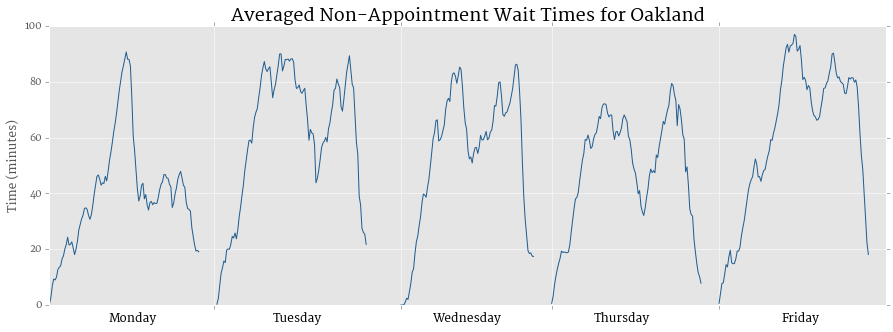

In [36]:
#retrim.index.
grouped = cleaned.groupby(lambda x :(x.dayofweek, x.hour, x.minute))
officename = 'Oakland'
grouped
grouped.mean()[officename].plot()
#loc, label = plt.xticks()
xlim = plt.xlim()
print(xlim)
#print(loc)
#loc = loc+50
loc = [ 118. , 252. , 360. , 480. ]
temp = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(loc,['', '', '', ''])
plt.title('Averaged Non-Appointment Wait Times for ' + officename,fontsize=18)
plt.ylabel('Time (minutes)')
plt.text(43, -6, 'Monday',fontsize=12)
plt.text(160, -6, 'Tuesday',fontsize=12)
plt.text(275, -6, 'Wednesday',fontsize=12)
plt.text(390, -6, 'Thursday',fontsize=12)
plt.text(525, -6, 'Friday',fontsize=12)


In [40]:
array_to_add = np.random.randint(0,100,short.shape[1])
print(array_to_add)
short.loc[datetime.datetime.now()] = array_to_add
for o in short.columns:
    print(o)

[70 73 77 52 32 92 78  3 70 86 44 76 30  6 84 72 24 84 31 51 54 16  4 75 38
 19  1 31 67 20 92  6 86 76 64 30 43 39 59  1  3 98 30 81 45 97 21 14 31 19
 22 77 90 65  9 87 23 20  8 59 42 61 13  6 50 23 49 45 92 10 63 11 31  6 78
 85 54 15 83  8 35 25  6 27 13 73 18 27 24 71  1 57 53 14 42 56 96 48 24 33
 36  2 68 18 61  1 95 77 45 37 24 29 48 86 75 82 34 34 87 96 92 89 30 59 22
 43 38 99 27  7 70 94  3 87 53 98 41 75 75 20 93 99 87 95 47 79  6 42 86 63
 66 99 86 56 70 43 98 19 23 74 65 85 93 98 71 29 65 63 42 69 87  8 36  7 94
  3 48 92]
Alturas
Arleta
Auburn
Bakersfield
Bakersfield-SW
Banning
Barstow
Bell Gardens
Bellflower
Bishop
Blythe
Brawley
Capitola
Carmichael
Chico
Chula Vista
Clovis
Coalinga
Colusa
Compton
Concord
Corte Madera
Costa Mesa
Crescent City
Culver City
Daly City
Davis
Delano
El Cajon
El Centro
El Cerrito
El Monte
Escondido
Escondido-CDL
Eureka
Fairfield
Fall River Mills
Folsom
Fontana
Fort Bragg
Fremont
Fresno
Fresno-North
Fullerton
Garberville
Gilroy
Glendale
Goleta
